In [2]:
import pandas as pd
import os

In [3]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')]

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)

In [4]:
all_data=pd.read_csv('all_data_copy.csv')

In [5]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
all_data=all_data.dropna(how='all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']

In [11]:
all_data['Month']=all_data['Order Date'].str[0:2]

In [12]:
all_data['Month']=all_data['Month'].astype('int32')

In [13]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [16]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])

In [17]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']

In [25]:
total=all_data.groupby(['Month']).sum()

<BarContainer object of 12 artists>

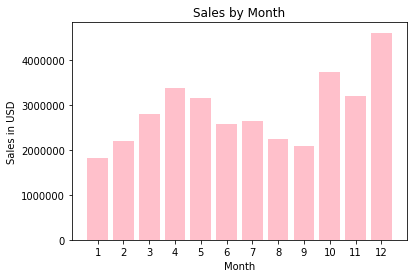

In [36]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.title('Sales by Month')
plt.bar(months,total['Sales'],color='pink')

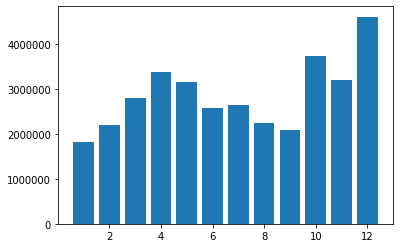

In [51]:
months=range(1,13)
y=all_data.groupby(['Month']).sum()
plt.bar(months,y['Sales'])
plt.show()

In [58]:
all_data['City']=all_data['Purchase Address'].apply(lambda x:x.split(',')[1]+''+x.split(',')[2])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001


In [62]:
y=all_data.groupby(['City']).sum()

<BarContainer object of 10 artists>

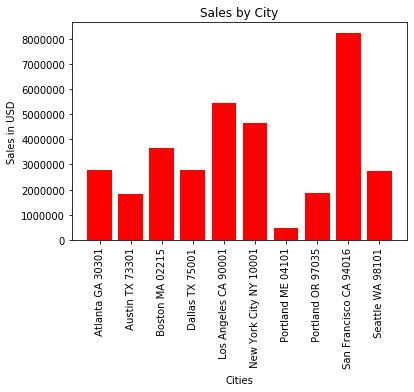

In [67]:
cities=[city for city, df in all_data.groupby(['City'])]
plt.xticks(rotation='vertical')
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.title('Sales by City')
plt.bar(cities,y['Sales'],color='r')

In [68]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [69]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001,9


In [72]:
p=all_data.groupby(['Hour']).count()['Quantity Ordered']

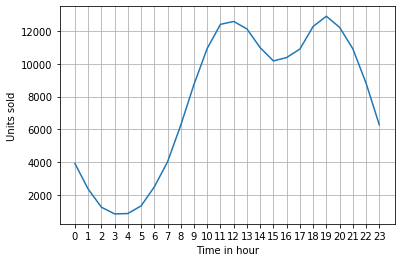

In [79]:
hours=[hour for hour, df in all_data.groupby(['Hour'])]
plt.xticks(hours)
plt.ylabel('Units sold')
plt.xlabel('Time in hour')
plt.grid()
plt.plot(hours,p)

In [115]:
o=all_data.loc[all_data.Product=='Google Phone'].groupby(['City']).count()
u=all_data.loc[all_data.Product=='Google Phone']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

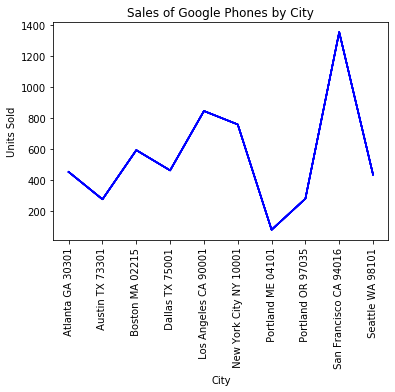

In [107]:
cities=[city for city,df in all_data.groupby(['City'])]
plt.plot(o,color='b')
plt.title('Sales of Google Phones by City')
plt.xlabel('City')
plt.ylabel('Units Sold')
plt.xticks(rotation='vertical')


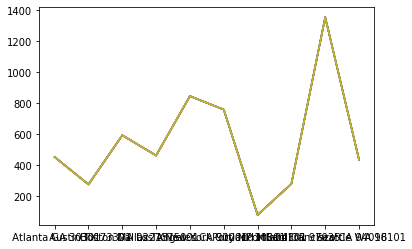

In [119]:
plt.plot(cities,u.groupby(['City']).count())

In [140]:
q=all_data.loc[all_data.Product=='Wired Headphones'].groupby(['Hour']).count()
q.sort_values('Sales',ascending=False)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Hour,,,,,,,,,
19,1301,1301,1301,1301,1301,1301,1301,1301,1301
18,1289,1289,1289,1289,1289,1289,1289,1289,1289
13,1260,1260,1260,1260,1260,1260,1260,1260,1260
11,1247,1247,1247,1247,1247,1247,1247,1247,1247
12,1244,1244,1244,1244,1244,1244,1244,1244,1244
20,1220,1220,1220,1220,1220,1220,1220,1220,1220
14,1150,1150,1150,1150,1150,1150,1150,1150,1150
10,1124,1124,1124,1124,1124,1124,1124,1124,1124
17,1088,1088,1088,1088,1088,1088,1088,1088,1088


<function matplotlib.pyplot.show(*args, **kw)>

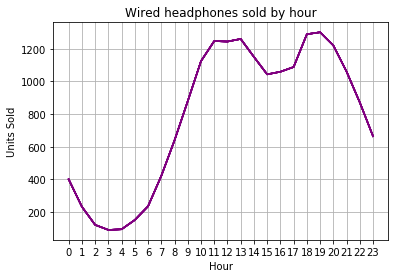

In [130]:
plt.plot(q,color='purple')
hours=[hour for hour, df in all_data.groupby(['Hour'])]
plt.xlabel('Hour')
plt.ylabel('Units Sold')
plt.title('Wired headphones sold by hour')
plt.grid()
plt.xticks(hours)
plt.show

In [141]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [143]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\jovan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [145]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001,9


In [152]:
e=all_data.groupby(['Product']).sum()
e.sort_values('Quantity Ordered',ascending=False)

,Quantity Ordered,Price Each,Month,Sales,Hour
Product,,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
USB-C Charging Cable,23975,261740.85,154819,286501.25,314645
Lightning Charging Cable,23217,323787.10,153092,347094.15,312529
Wired Headphones,20557,226395.18,133397,246478.43,271720
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
iPhone,6849,4789400.00,47941,4794300.00,98657


In [160]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
keys = [product for product, df in product_group]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

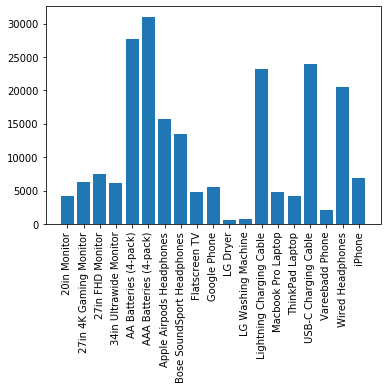

In [162]:
plt.bar(keys,quantity_ordered)
plt.xticks(rotation='vertical')